In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns

import sys
sys.path.append('/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/orthorep/src/')
import _config

sys.path.append('/home/unix/maxwshen/')
from mylib import util

notebook_nm = 'fig_plot_mut_trajs'
results_dir = _config.RESULTS_PLACE + f'{notebook_nm}/'
util.ensure_dir_exists(results_dir)

Using data folder:
 /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/orthorep/data/


In [82]:
nt_pos_renaming = {
    'V8': 'V8V',
    'H12': 'Y12H',
    'V21': 'E21V',
    'D33': 'N33D',
    'N54': 'D54N',
    'H57': 'Y57H',
    'R59': 'C59R',
    'Y59': 'C59Y',
    'R96': 'K96R',
    'N108': 'S108N',
    'E160': 'K160E',
    'K180': 'K180K',
    'A737': '737insA',
}

li_palette = {
    'V8V': '#00aeb3',
    'Y12H': '#ed4795',
    'E21V': '#f47b16',
    'N33D': '#a589d9',
    'D54N': '#7cb82f',
    'Y57H': '#00a0dc',
    'C59R': '#efb920',
    'C59Y': '#86898c',
    'K96R': '#008cc9',
    'S108N': '#ec4339',
    'K160E': '#f3c746',
    'K180K': '#f371af',
    '737insA': '#a0a3a6',
}

In [67]:
def load_data(fig_nm):
    print(fig_nm)
    df = pd.read_csv(_config.DATA_DIR + f'data_{fig_nm}.csv')
    ok_ntpos = [s for s in df['Nucleotide and position'] if '_' not in s]

    df = df[df['Nucleotide and position'].isin(ok_ntpos)]

    df['Nucleotide and position'] = [nt_pos_renaming[s] for s in df['Nucleotide and position']]

    dfm = df.melt(id_vars = 'Nucleotide and position', var_name = 'Passage', value_name = 'Frequency')
    dfm.head()
    dfm['Passage'] = dfm['Passage'].astype(int)
    dfm['Frequency'] *= 100
    dfm['Mutation'] = dfm['Nucleotide and position']
    
    return dfm

In [84]:
def plot(dfm):
    #
    import matplotlib
    matplotlib.rc('font', family = 'Arial', size = 15)
    matplotlib.rcParams['mathtext.fontset'] = 'custom'
    matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
    #

    muts = set(dfm['Mutation'])
    colors = sns.husl_palette(n_colors = int(len(muts) * 1.1), s = 1.0, l = 0.7)
    palette = {mut: color for mut, color in zip(muts, colors)}
    
    #
    
#     fig, ax = plt.subplots(figsize = (6, 4))
    fig, ax = plt.subplots(figsize = (7, 5))

    sns.lineplot(
        x = 'Passage',
        y = 'Frequency',
        hue = 'Mutation',
        palette = li_palette,
        data = dfm,
        linewidth = 1.5,
#         marker = 'o',
#         markersize = 7,
        ax = ax,
    )
    ax.get_legend().remove()
    plt.grid(alpha = 0.2)

    plt.xlabel('Passage')
    plt.ylabel('Fraction of sequenced reads\nestimated by Surveyor (%)')
    plt.xticks(np.arange(0, 13 + 1))
    # plt.xlim([0, 13.1])
    # plt.ylim([0, 102])

    plt.tight_layout()

    ##

    sns.despine(trim = True)
    ax.tick_params(length = 4.5, color = 'black', width = 1.5)
    for axis in ['bottom', 'left']:
        ax.spines[axis].set_linewidth(1.5)
        ax.spines[axis].set_color('black')

    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42

    out_fn = results_dir + f'{fig_nm}.pdf'
    print(f'Saving to {out_fn} ...')
    plt.savefig(out_fn, transparent = True, bbox_inches = 'tight')

    plt.show()
    plt.close()
    ##

    '''
        Save legend figure separately
        https://stackoverflow.com/questions/4534480/get-legend-as-a-separate-picture-in-matplotlib
    '''
    fig_leg = plt.figure(figsize = (3, 3))
    ax_leg = fig_leg.add_subplot(111)

    # add the legend from the previous axes
    ax_leg.legend(
        *ax.get_legend_handles_labels(), 
        loc = 'center',
        handler_map = {}
    )

    # hide the axes frame and the x/y labels
    ax_leg.axis('off')

    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    fig_leg.savefig(results_dir + f'{fig_nm}_legend.pdf', transparent = True, bbox_inches = 'tight')

    plt.show()
    plt.close()
    ##
    
    return

## 3c

3c
Saving to /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/orthorep/results/fig_plot_mut_trajs/3c.pdf ...


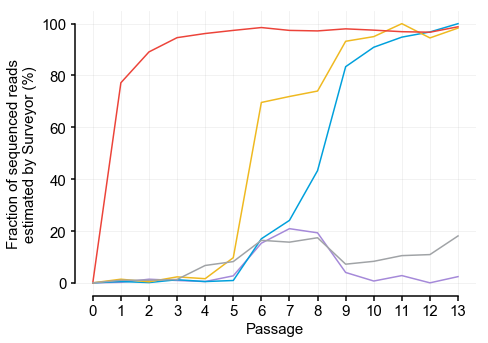

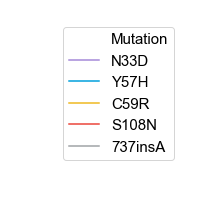

In [85]:
fig_nm = '3c'

dfm = load_data(fig_nm)
plot(dfm)

## 3d

3d
Saving to /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/orthorep/results/fig_plot_mut_trajs/3d.pdf ...


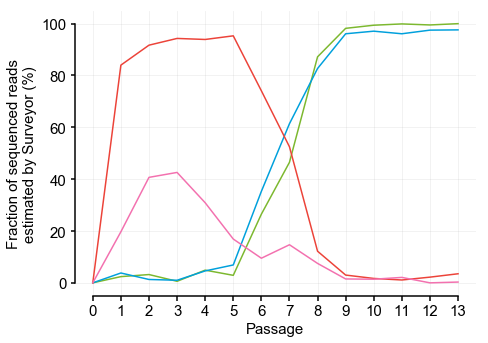

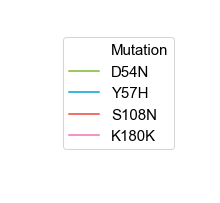

In [86]:
fig_nm = '3d'

dfm = load_data(fig_nm)
plot(dfm)

## s5a

s5a
Saving to /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/orthorep/results/fig_plot_mut_trajs/s5a.pdf ...


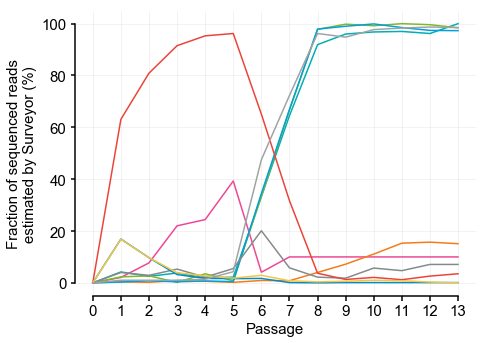

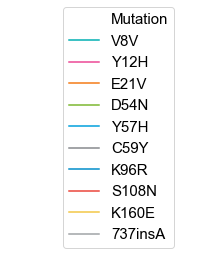

In [87]:
fig_nm = 's5a'

dfm = load_data(fig_nm)
plot(dfm)